In [16]:
from utils import ext_transforms as et
import utils

from PIL import Image
from matplotlib import pyplot as plt
import torch
import numpy as np

(512, 416, 3)
image shape (512, 416, 3)
[0 0 0]
[106 106 106]


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

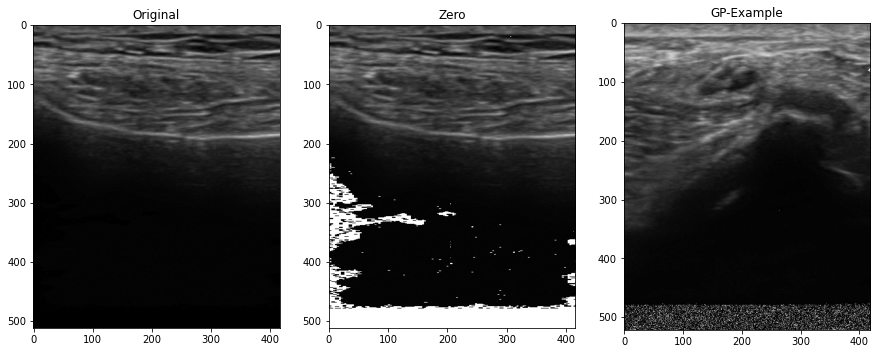

In [17]:
img = Image.open('/data1/sdi/datasets/CPN_all/Images/FH_I0000916_2.bmp').convert('RGB')
img = Image.open('/data1/sdi/datasets/CPN_all/Images/FH_I0000677.bmp').convert('RGB')
gimg = Image.open('/data1/sdi/datasets/CPN_all_GP/std002/Images/FH_I0000916_2.bmp').convert('RGB')
tmp = np.array(img)
tmp[np.array(img) == 0] = 255

plt.figure(figsize=(15, 45))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(tmp, ), plt.title('Zero')
plt.subplot(133), plt.imshow(gimg, ), plt.title('GP-Example')

print(np.shape(np.array(img) == 0))
print('image shape', np.shape(np.array(img)))
print(np.array(img)[500, 100, :])
print(np.array(gimg)[500, 100, :])
np.array(img)[np.array(img) == 0]

<PIL.Image.Image image mode=RGB size=416x512 at 0x7F245D6F0E10>


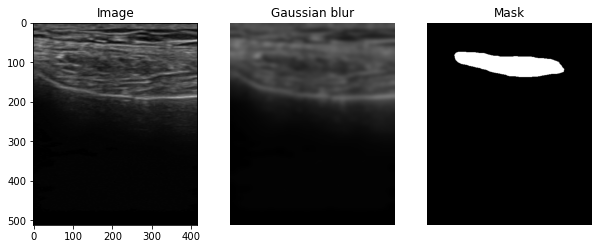

In [18]:
img = Image.open('/data1/sdi/datasets/CPN_all/Images/FH_I0000677.bmp').convert('RGB')
ma = Image.open('/data1/sdi/datasets/CPN_all/Masks/FH_I0000677_mask.bmp').convert('L')

result, ma = et.GaussianBlur(kernel_size=(49, 49), sigma=(5, 5))(img, ma)
print(result)

plt.figure(figsize=(10, 30))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(132), plt.imshow(np.array(result), cmap='gray'), plt.title('Gaussian blur'), plt.axis('off')
plt.subplot(133), plt.imshow(ma, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.show()

PIL image (512, 416, 3)
Tensor torch.Size([3, 512, 416])
torch.float64
torch.float32


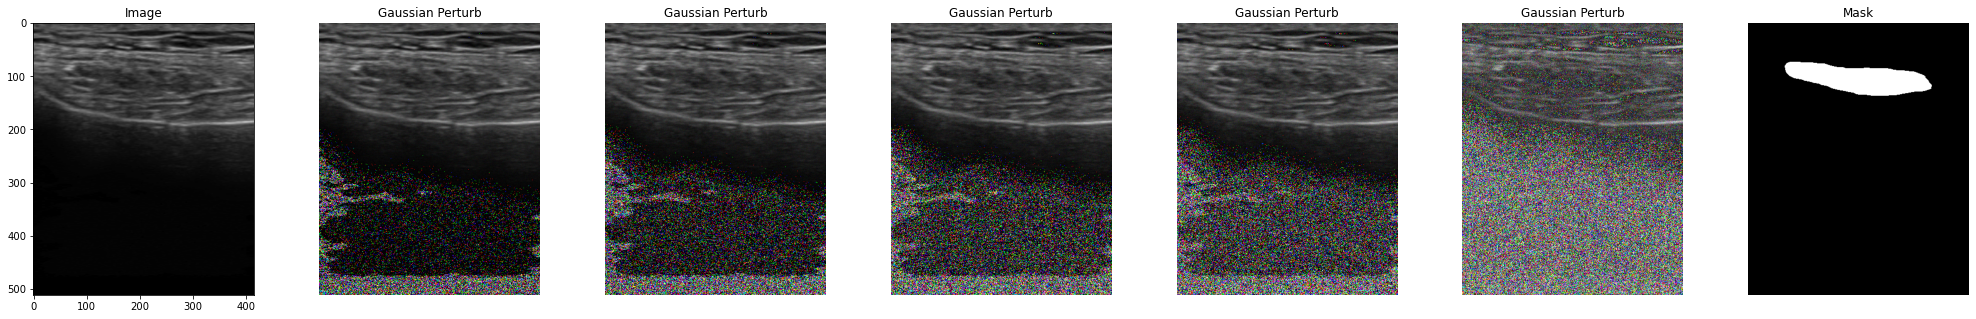

In [20]:
def genImage(im):
    denorm = utils.Denormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return (denorm(im.numpy()) * 255).transpose(1, 2, 0).astype(np.uint8)

print('PIL image', np.shape(img))

ext_trans = [ et.ExtToTensor(), 
                et.ExtNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                et.GaussianPerturb(mean=0, std=0.1) ]

pic, lbl = ext_trans[0](img, ma)
pic, lbl = ext_trans[1](pic, lbl)

gp = np.random.normal(0, 2, np.shape(pic.numpy()))

print('Tensor', pic.size())
torch.from_numpy(gp).size()

tmp = pic + torch.from_numpy(gp)
print(tmp.dtype)
print(pic.dtype)

tmp1, lbl = et.GaussianPerturb(std=0.05)(pic, lbl)
tmp2, lbl = et.GaussianPerturb(std=0.07)(pic, lbl)
tmp3, lbl = et.GaussianPerturb(std=0.09)(pic, lbl)
tmp4, lbl = et.GaussianPerturb(std=0.11)(pic, lbl)
tmp5, lbl = et.GaussianPerturb(std=0.5)(pic, lbl)

plt.figure(figsize=(35, 5))
plt.subplot(171), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(172), plt.imshow(genImage(tmp1), cmap='gray'), plt.title('Gaussian Perturb'), plt.axis('off')
plt.subplot(173), plt.imshow(genImage(tmp2), cmap='gray'), plt.title('Gaussian Perturb'), plt.axis('off')
plt.subplot(174), plt.imshow(genImage(tmp3), cmap='gray'), plt.title('Gaussian Perturb'), plt.axis('off')
plt.subplot(175), plt.imshow(genImage(tmp4), cmap='gray'), plt.title('Gaussian Perturb'), plt.axis('off')
plt.subplot(176), plt.imshow(genImage(tmp5), cmap='gray'), plt.title('Gaussian Perturb'), plt.axis('off')
plt.subplot(177), plt.imshow(lbl, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.show()

float32
float32
gp size:  torch.Size([3, 512, 416])
pic size:  torch.Size([3, 512, 416])


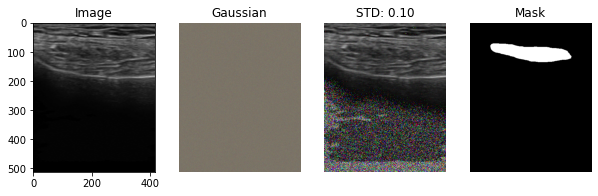

In [45]:
pic, lbl = ext_trans[0](img, ma)
pic, lbl = ext_trans[1](pic, lbl)

std = 0.1
gp = np.random.normal(0, std, np.shape(pic.numpy()))
gp = np.array(gp)
gp = torch.from_numpy(gp).type(torch.float32)
pic = pic + gp
#pic, lbl = ext_trans[2](pic, ma)

print(np.array(np.add(pic, gp),).dtype)
print(np.array(pic,).dtype)

print('gp size: ', np.shape(gp))
print('pic size: ', np.shape(pic))

plt.figure(figsize=(10, 40))
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(142), plt.imshow(genImage(gp), ), plt.title('Gaussian'), plt.axis('off')
plt.subplot(143), plt.imshow(genImage(pic), cmap='gray'), plt.title('STD: %0.2f' %std), plt.axis('off')
plt.subplot(144), plt.imshow(ma, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.show()

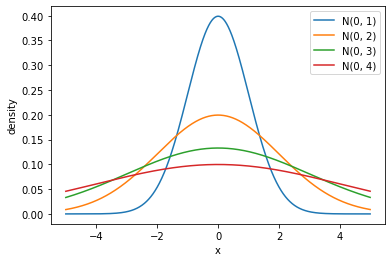

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
    return (1 / np.sqrt(2*np.pi * sigma**2)) * np.exp(- (x-mean)**2 / (2*sigma**2))

legend = []
for i in range(1, 5):
    legend.append(f'N(0, {i})')
    plt.plot(x, gaussian(x, 0, i))

plt.xlabel('x')
plt.ylabel('density')
plt.legend(legend)
plt.show()

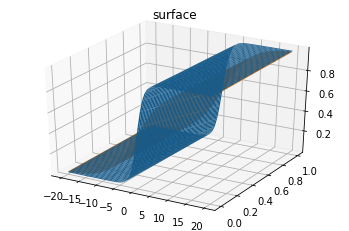

In [93]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

def z_function(x, y, t):
    return np.exp(x / t) / (np.exp(x / t) + np.exp(y / t))

x = np.linspace(-20, 20, 60)
y = np.linspace(0, 1, 60)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y, 1.0)
Z2 = z_function(X, Y, 4.0)

ax.plot_wireframe(X, Y, Z, color='green')
ax.plot_wireframe(X, Y, Z2, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, edgecolor='none')
ax.set_title('surface')

plt.show()

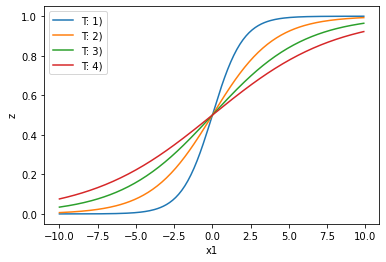

In [108]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(-10, 10, 0.1)

def soft_label(x, y, t):
    return np.exp(x / t) / (np.exp(x / t) + np.exp(y / t))

legend = []
for i in range(1, 5):
    legend.append(f'T: {i})')
    plt.plot(x1, soft_label(x1, -0.0, i))

plt.xlabel('x1')
plt.ylabel('z')
plt.legend(legend)
plt.show()